In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset
import matplotlib.patches as mpatches
from matplotlib.offsetbox import AnchoredText
import scipy as sp
import scipy.fftpack
from scipy.signal import chirp, find_peaks, peak_widths
plt.style.use(['science','nature','notebook'])

In [2]:
##data
# path1=r"C:\Users\KuChris\Desktop\plot\lasercheck\1"
# joined_files_1 = os.path.join(path1, "*.fft")
# joined_list_1 = glob.glob(joined_files_1)

# csvfft01 = [x for x in joined_list_1 if x.endswith('.fft')]
# fnsfft01 = [os.path.splitext(os.path.basename(x))[0] for x in csvfft01]
# numfft01 = np.arange(1,len(fnsfft01)+1)

# dfft01 = {}
# for i in np.arange(len(fnsfft01)):
#     dfft01[numfft01[i]] = pd.read_csv(csvfft01[i])


##backgrounddata
pathback=r"C:\Users\KuChris\Desktop\plot\lasercheck\2"
joined_files_back = os.path.join(pathback, "*.fft")
joined_list_back = glob.glob(joined_files_back)

csvfft00 = [x for x in joined_list_back if x.endswith('.fft')]
fnsfft00 = [os.path.splitext(os.path.basename(x))[0] for x in csvfft00]
numfft00 = np.arange(1,len(fnsfft00)+1)

dfft00 = {}
for i in np.arange(len(fnsfft00)):
    dfft00[numfft00[i]] = pd.read_csv(csvfft00[i])

dfft000 = pd.concat(map(pd.read_csv, joined_list_back), ignore_index=True, axis=1)

(2000.0, 4500.0)

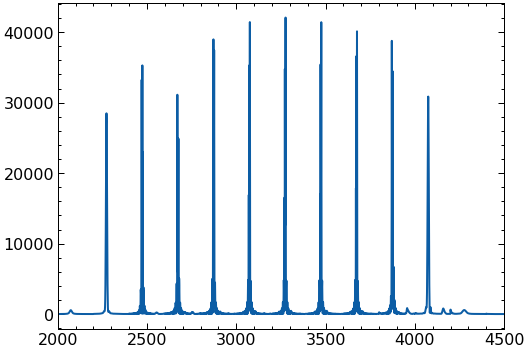

In [3]:
start = 2000
end = 4500

plt.figure()

plt.plot(dfft000[0])

plt.xlim(start,end)

In [16]:
peaks,_= find_peaks(dfft000[0][start:end], height=0, distance=195)
np.diff(peaks)
results_half = peak_widths(dfft000[0][start:end], peaks, rel_height=0.5)
widths = results_half[0]
width_heights = results_half[1]

widths, peaks+start, np.diff(peaks)

(array([15.22225333,  7.28238371,  1.25465636,  2.03270125,  1.41644905,
         2.32818451,  2.34063129,  2.33137525,  2.30770468,  2.1440887 ,
         7.68495807, 23.60860882,  2.53040111]),
 array([2073, 2273, 2474, 2670, 2872, 3076, 3276, 3476, 3676, 3871, 4075,
        4277, 4496], dtype=int64),
 array([200, 201, 196, 202, 204, 200, 200, 200, 195, 204, 202, 219],
       dtype=int64))

13

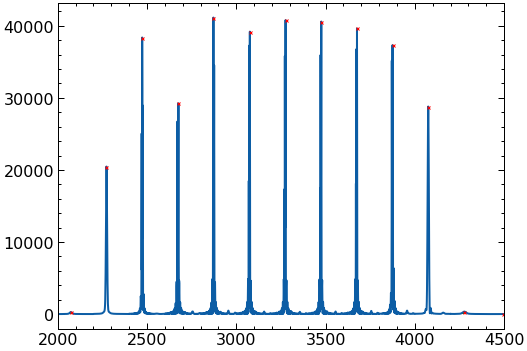

In [114]:
# #/position of peak
plt.figure()
plt.plot(dfft000[0])
plt.plot(peaks+start,dfft000[0][peaks+start], "x",color="r")
plt.hlines(results_half[1],results_half[2]+start,results_half[3]+start, color="g")
plt.xlim(start,end)
len(peaks)

Text(0, 0.5, '$\\omega_r/\\delta\\omega$')

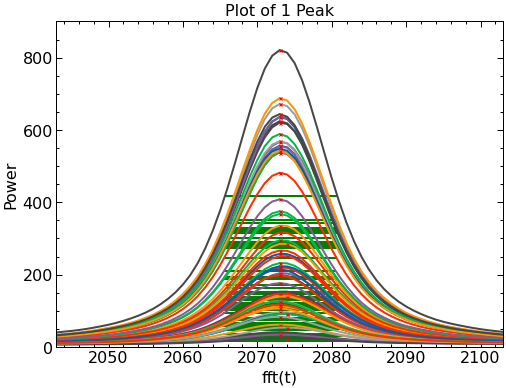

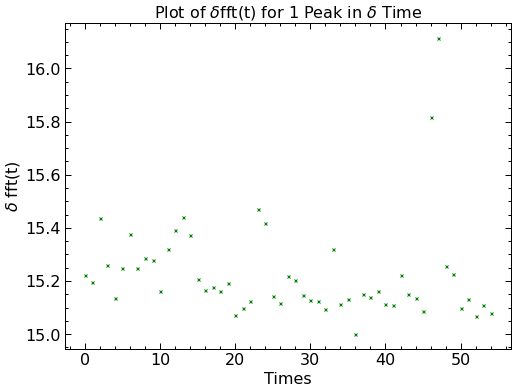

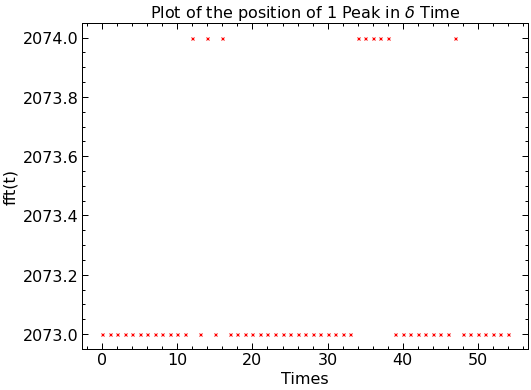

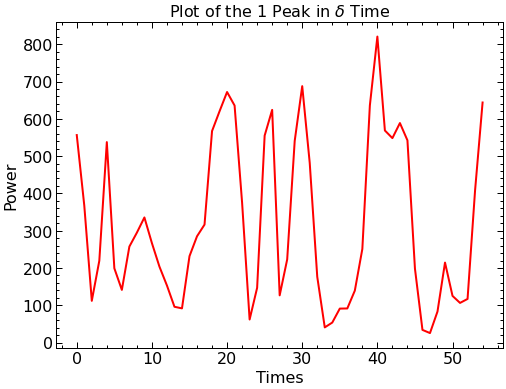

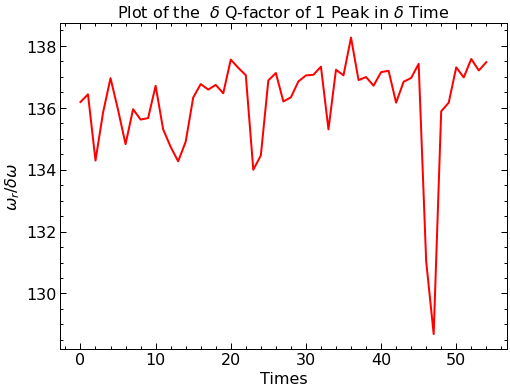

In [43]:
# setting
space = 195
number_of_peak = 1


#data and plot
widths=[]
width_heights=[]
peak =[]
peak_value=[]
Qfactor=[]

i=number_of_peak-1
for n in np.arange(len(fnsfft00)):

    peaks,_= find_peaks(dfft000[n][start:end], height=0, distance=space)
    results_half = peak_widths(dfft000[n][start:end], peaks, rel_height=0.5)
    results_full = peak_widths(dfft000[n][start:end], peaks, rel_height=0.99)

    widths.append(results_half[0][i])
    width_heights.append(results_half[1][i])
    peak.append(peaks[i]+start)
    peak_value.append(dfft000[n][peaks[i]+start])
    Qfactor.append((peaks[i]+start)/results_half[0][i])
    
    plt.plot(dfft000[n])
    plt.plot(peaks+start,dfft000[n][peaks+start], "x",color="r")
    plt.hlines(results_half[1],results_half[2]+start,results_half[3]+start, color="g")
    plt.xlim(peaks[i]+start-int(2*results_half[0][i]),peaks[i]+start+int(2*results_half[0][i]))
    plt.ylim(0,int(max(peak_value)*1.1))
    plt.title('Plot of {} Peak'.format(number_of_peak))
    plt.xlabel('fft(t)')
    plt.ylabel('Power')

##
plt.figure()
plt.plot(np.arange(len(widths)),widths,"x",c='g')
plt.title('Plot of $\delta$fft(t) for {} Peak in $\delta$ Time'.format(number_of_peak))
plt.xlabel('Times')
plt.ylabel('$\delta$ fft(t)')

plt.figure()
plt.plot(np.arange(len(peak)),peak,"x",c='r')
plt.title('Plot of the position of {} Peak in $\delta$ Time'.format(number_of_peak))
plt.xlabel('Times')
plt.ylabel('fft(t)')

plt.figure()
plt.plot(np.arange(len(peak)),peak_value,c='r')
plt.title('Plot of the {} Peak in $\delta$ Time'.format(number_of_peak))
plt.xlabel('Times')
plt.ylabel('Power')

plt.figure()
plt.plot(np.arange(len(peak)),Qfactor,c='r')
plt.title('Plot of the  $\delta$ Q-factor of {} Peak in $\delta$ Time'.format(number_of_peak))
plt.xlabel('Times')
plt.ylabel('$\omega_r/\delta\omega$')

